In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import gaussian_kde
from scipy.stats import norm
from scipy.stats import gaussian_kde

10217
16322
(10217,)
(16322,)


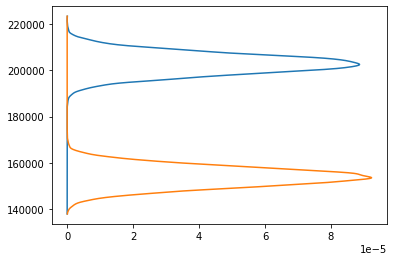

In [93]:
files = [
    '/Users/maximilientirard/Documents/Processing/SnakeAI/game_lengths_fixedHamiltonianPath.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/game_lengths_HamiltonianPath2.txt'
]
datas = []
min_val = None
max_val = None
for file in files:
    with open(file) as f:
        content = f.readlines()
    data = [int(x.strip()) for x in content]
    datas.append(data)
    if min_val is None:
        min_val = min(data)
    else:
        min_val = min(min(data), min_val)
    if max_val is None:
        max_val = max(data)
    else:
        max_val = max(max(data), max_val)
    print(len(data))
xs = np.linspace(min_val, max_val,1000)
for data in datas:
    print(np.shape(data))
    density = gaussian_kde(data)
    #density.covariance_factor = lambda : 0.25
    #density._compute_covariance()
    plt.plot(density(xs), xs)
    #plt.plot(xs,norm.pdf(xs, np.mean(data), np.std(data, ddof=1)))
plt.rcParams["figure.figsize"] = (4,6)
plt.show()

In [2]:
from matplotlib.widgets import Slider, Button


# The parametrized function to be plotted
def f(t, amplitude, frequency):
    return amplitude * np.sin(2 * np.pi * frequency * t)

t = np.linspace(0, 1, 1000)

# Define initial parameters
init_amplitude = 5
init_frequency = 3

# Create the figure and the line that we will manipulate
fig, ax = plt.subplots()
line, = plt.plot(t, f(t, init_amplitude, init_frequency), lw=2)
ax.set_xlabel('Time [s]')

axcolor = 'lightgoldenrodyellow'
ax.margins(x=0)

# adjust the main plot to make room for the sliders
plt.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
freq_slider = Slider(
    ax=axfreq,
    label='Frequency [Hz]',
    valmin=0.1,
    valmax=30,
    valinit=init_frequency,
)

# Make a vertically oriented slider to control the amplitude
axamp = plt.axes([0.1, 0.25, 0.0225, 0.63], facecolor=axcolor)
amp_slider = Slider(
    ax=axamp,
    label="Amplitude",
    valmin=0,
    valmax=10,
    valinit=init_amplitude,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(f(t, amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
files = [
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy1.txt',
    '/Users/maximilientirard/Documents/Processing/SnakeAI/policy2.txt'
]
seq_of_means = []
densities = [[] for j in range(898)]
for file in files:
    with open(file) as f:
        content = f.readlines()
    lines = [x.strip() for x in content]
    deltas = [ [] for _ in range(899) ]
    for line in lines:
        times = [int(x.strip()) for x in line.split()]
        times.insert(0, 0)
        for i in range(899):
            deltas[i].append(times[i+1]-times[i])
    means = []
    for i in range(898):
        densities[i].append(gaussian_kde(deltas[i]))
        means.append(np.mean(deltas[i]))
    seq_of_means.append(means)

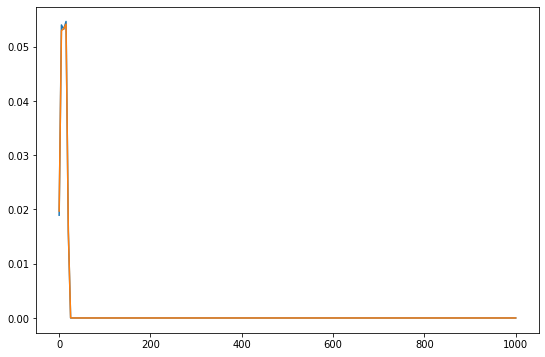

In [16]:
#%matplotlib widget


#fig, ax = plt.subplots()
#plt.subplots_adjust(bottom=0.25)
#fig,(ax0, ax1) = plt.subplots(2, 1)
#axis.margins(x=0)

#slider_ax = plt.axes([0.2, 0.1, 0.7, 0.03])
#food_slider = Slider(slider_ax, '#Food', 0, 898, valstep=1)

#print(np.shape(densities))

#l, = plt.plot(xs, densities[30](xs))
#for density in densities[0]:
#    ax.plot(xs, density(xs))
#l, = ax.plot(xs, densities[30](xs))
#ax.plot(xs, densities[0](xs))
#ax.plot(xs, densities[897](xs))

#def update(val):
#    ax.clf()
#    for density in densities[val]:
#        ax.plot(xs, density(xs))
    #ax.plot(xs, densities[val](xs))
#food_slider.on_changed(update)

#ax0.rcParams["figure.figsize"] = (9,6)
#ax1.rcParams["figure.figsize"] = (9,2)
#plt.show()



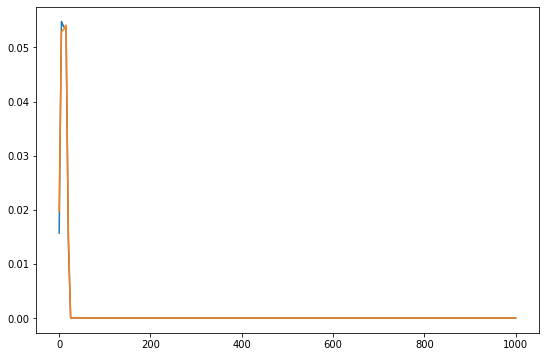

In [18]:
min_val = 0
max_val = 1000
xs = np.linspace(min_val, max_val,200)

for i in range(0, 898, 40):
    plt.clf()
    plt.rcParams["figure.figsize"] = (9,6)
    for density in densities[i]:
        plt.plot(xs, density(xs))
    plt.savefig("/Users/maximilientirard/Documents/Processing/SnakeAI/plots/fig"+str(i)+".png")
plt.show()

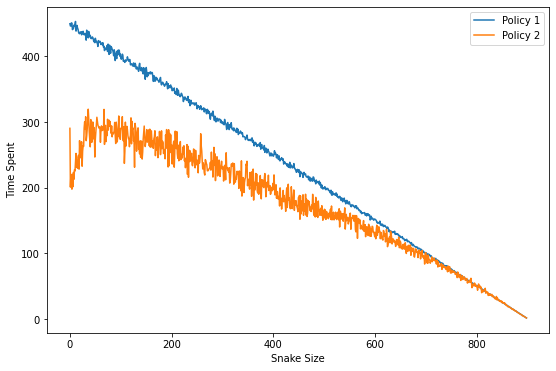

In [33]:
xs = np.linspace(0, 898, 898)
i = 1
for means in seq_of_means:
    #print(seq_of_means)
    plt.plot(xs, means, label = "Policy "+str(i))
    i += 1
plt.xlabel("Snake Size")
plt.ylabel("Time Spent")
plt.legend()
plt.show()